In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
#files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDataset/SentimentFul/'+file+'.csv')
    #price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-12-20 14:30:00           0.0        0.0       0.0   
1           2  2017-12-20 14:45:00           0.0        0.0       0.0   
2           3  2017-12-20 15:00:00           0.0        0.0       0.0   
3           4  2017-12-20 15:15:00           0.0        0.0       0.0   
4           5  2017-12-20 15:30:00           0.0        0.0       0.0   
5           6  2017-12-20 15:45:00           0.0        0.0       0.0   
6           7  2017-12-20 16:00:00           0.0        0.0       0.0   
7           8  2017-12-20 16:15:00           0.0        0.0       0.0   
8           9  2017-12-20 16:30:00           0.0        0.0       0.0   
9          10  2017-12-20 16:45:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.5        0.0       1.5   
5           6  2017-08-14 15:00:00           0.5        0.0       1.5   
6           7  2017-08-14 15:15:00           0.5        0.0       1.5   
7           8  2017-08-14 15:30:00           0.5        0.0       1.5   
8           9  2017-08-14 15:45:00           0.5        0.0       1.5   
9          10  2017-08-14 16:00:00           0.5        0.0       1.5   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.5   
5           6  2017-08-14 15:00:00           0.0        0.0       0.5   
6           7  2017-08-14 15:15:00           0.0        0.0       0.5   
7           8  2017-08-14 15:30:00           0.0        0.0       0.5   
8           9  2017-08-14 15:45:00           0.0        0.0       0.5   
9          10  2017-08-14 16:00:00           0.0        0.0       0.5   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000  0.000000   
1           2  2017-08-14 14:00:00           0.0   0.000000  0.000000   
2           3  2017-08-14 14:15:00           0.0   0.333333  0.666667   
3           4  2017-08-14 14:30:00           0.0   0.166667  1.333333   
4           5  2017-08-14 14:45:00           0.5   0.083333  2.166667   
5           6  2017-08-14 15:00:00           0.5   1.083333  3.166667   
6           7  2017-08-14 15:15:00           0.5   1.083333  3.166667   
7           8  2017-08-14 15:30:00           0.5   1.083333  3.166667   
8           9  2017-08-14 15:45:00           0.5   1.083333  5.166667   
9          10  2017-08-14 16:00:00           0.5   1.083333  5.166667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000     0.000000          0.0          0.0         0  
1  0.000000     0.000000          0.0          0.0         0  
2  0.33

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [3]:
def buildModel(l,n,d,le):
    opt=optimizers.Adam(lr=le)
    model = Sequential()  
    model.add(Dense(n, input_dim=151,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
def onlythreshold(prediction,threshold,x,y):
    xtres=[]
    ytres=[]
    for j in range(0,len(x)):
         if(prediction[j]>=0.5+threshold or prediction[j]<=0.5-threshold):
                xtres.append(x[j])
                ytres.append(y[j])
    xtres=np.array(xtres)
    ytres=np.array(ytres)
    return xtres, ytres

Working on... AAPL
15.571701720841297
0.005338458253266777
working on d,u and l,learn 0.5 64 0.05 0.001


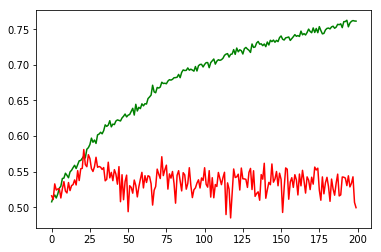

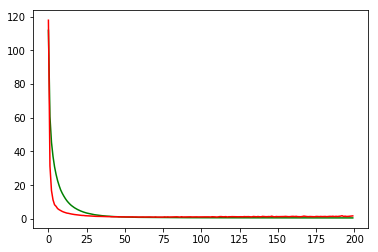

working on d,u and l,learn 0.5 64 0.05 0.0001


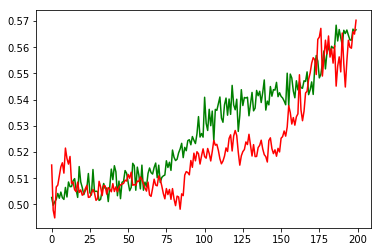

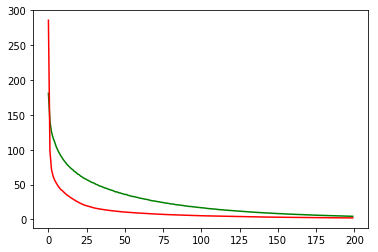

working on d,u and l,learn 0.5 64 0.01 0.001


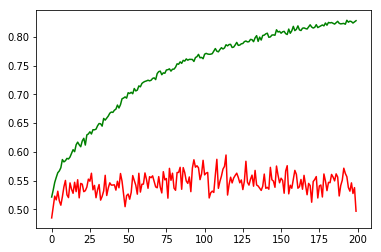

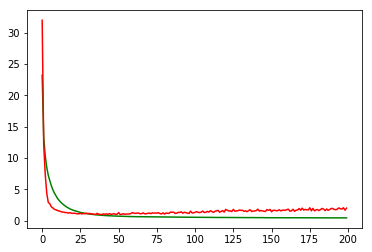

working on d,u and l,learn 0.5 64 0.01 0.0001


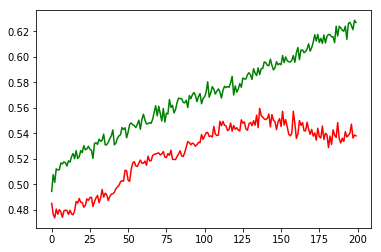

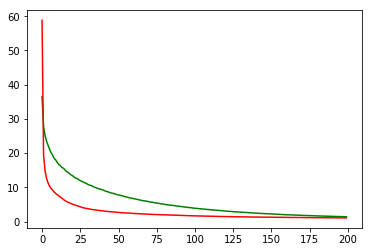

working on d,u and l,learn 0.5 128 0.05 0.001


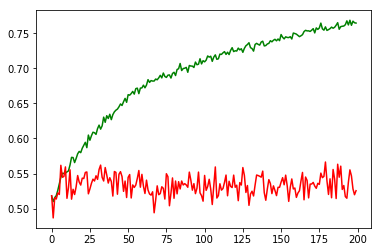

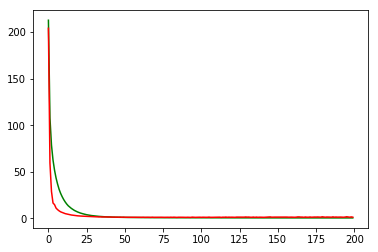

working on d,u and l,learn 0.5 128 0.05 0.0001


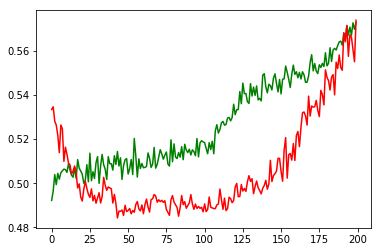

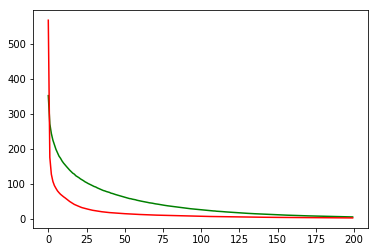

working on d,u and l,learn 0.5 128 0.01 0.001


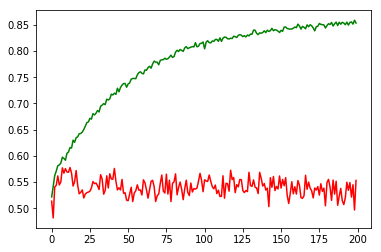

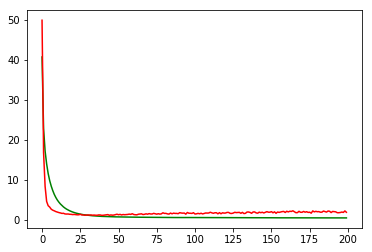

working on d,u and l,learn 0.5 128 0.01 0.0001


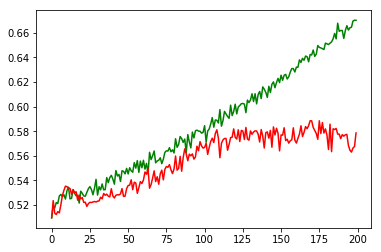

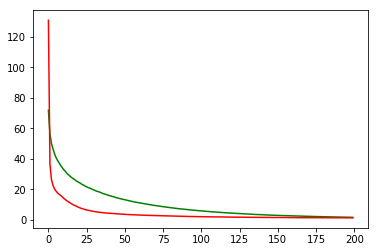

Chart for BEST MODEL FOR: AAPL


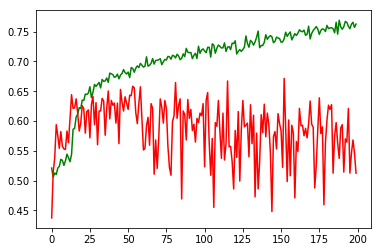

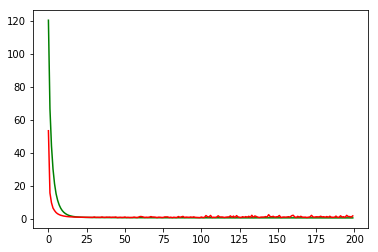

F1,score 0.3205918618988903
G-score: 0.42995924677426467
Accuracy 0.5123893805309735
Accuracy with threshold: 0.5123893805309735
Window: 140
[[449  57]
 [494 130]]
Vol pos 2.9149271867829323
Vol neg 3.4464529599904736
Real Percentage of gain: 12.678547836880588
Percentage of gain: -0.1869493272632151
Total gain: -211.25273980743304
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.7319893]
ecco la somma Negativa: [0.05536583]
[[352  26]
 [331  44]]
Accuracy: [1.9161598917299691, 0.5258964143426295]
Accuracy with threshold: [2.0599979646336872, 0.5276532137518685]
Percentile:  1
ecco la somma Positiva: [0.7971655]
ecco la somma Negativa: [0.07972979]
[[46 22]
 [50 34]]
Accuracy: [1.7628793755644245, 0.5263157894736842]
Accuracy with threshold: [1.9989958256483078, 0.5409836065573771]
Percentile:  2
ecco la somma Positiva: [0.7167899]
ecco la somma Negativa: [0.13855138]
[[51  9]
 [50 29]]
Accuracy: [0.5980252632134252, 0.5755395687741341]
Accurac

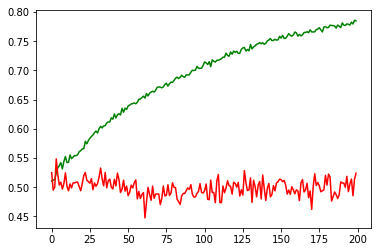

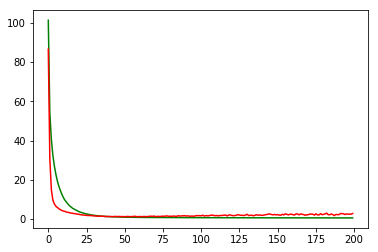

working on d,u and l,learn 0.5 64 0.05 0.0001


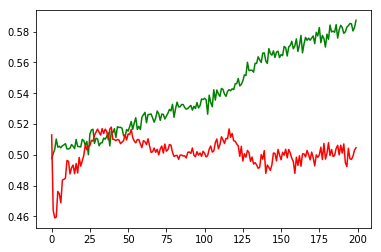

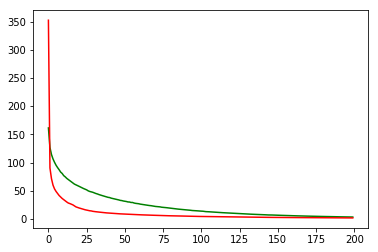

working on d,u and l,learn 0.5 64 0.01 0.001


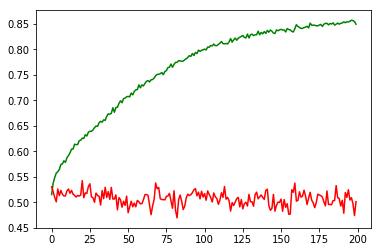

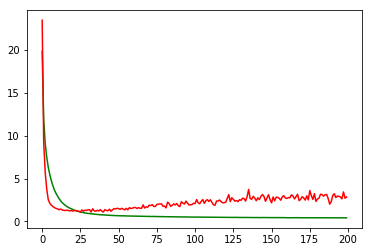

working on d,u and l,learn 0.5 64 0.01 0.0001


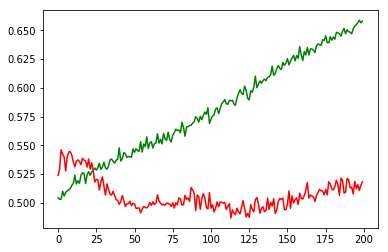

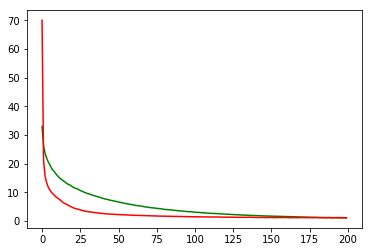

working on d,u and l,learn 0.5 128 0.05 0.001


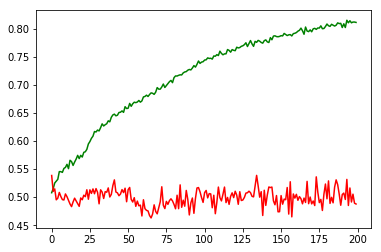

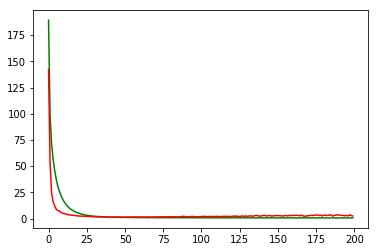

working on d,u and l,learn 0.5 128 0.05 0.0001


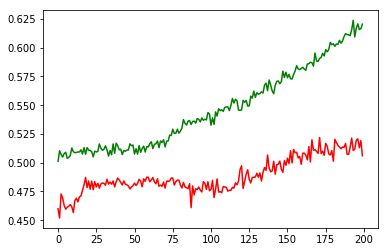

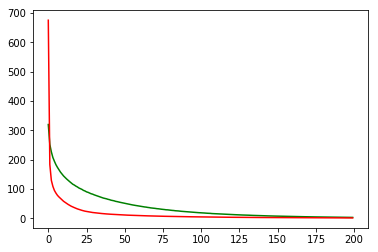

working on d,u and l,learn 0.5 128 0.01 0.001


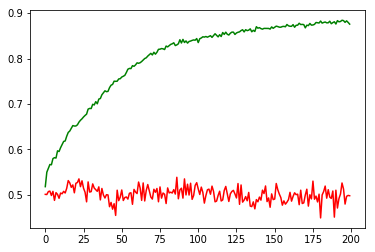

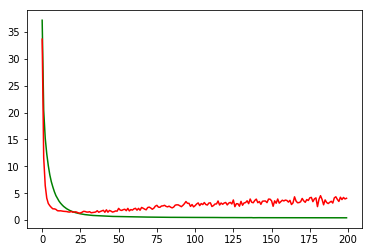

working on d,u and l,learn 0.5 128 0.01 0.0001


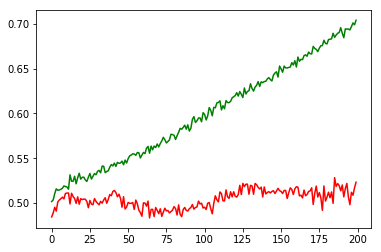

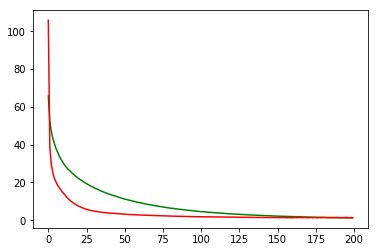

Chart for BEST MODEL FOR: AMZN


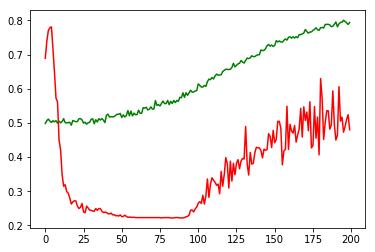

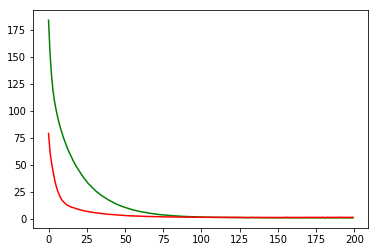

F1,score 0.6049631120053655
G-score: 0.4331690011426566
Accuracy 0.47968197627118114
Accuracy with threshold: 0.479681978693278
Window: 140
[[ 92 159]
 [430 451]]
Vol pos 2.3342501548087347
Vol neg 2.389393675617562
Real Percentage of gain: 22.5785617326759
Percentage of gain: -0.12354685589894093
Total gain: -139.85504087760114
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.83587116]
ecco la somma Negativa: [0.27025998]
[[ 90 109]
 [226 205]]
Accuracy: [1.042641388896912, 0.46825396844318934]
Accuracy with threshold: [1.1545169071680834, 0.4671201801894744]
Percentile:  1
ecco la somma Positiva: [0.844542]
ecco la somma Negativa: [0.3911528]
[[  2  34]
 [157 192]]
Accuracy: [0.9696149209103027, 0.5038961038961038]
Accuracy with threshold: [1.0343378656788875, 0.5403508761472869]
Percentile:  2
ecco la somma Positiva: [0.85143197]
[[ 0 16]
 [18 42]]
Accuracy: [0.9618773021196064, 0.5526315773788252]
Accuracy with threshold: [1.023422919087490

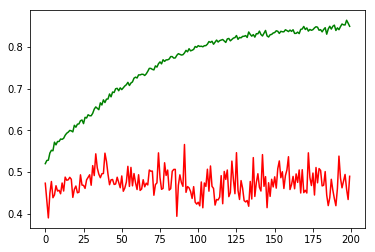

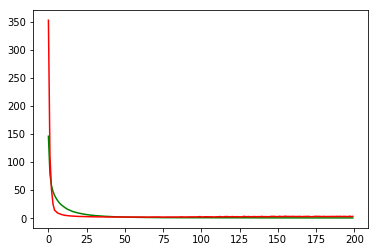

working on d,u and l,learn 0.5 64 0.05 0.0001


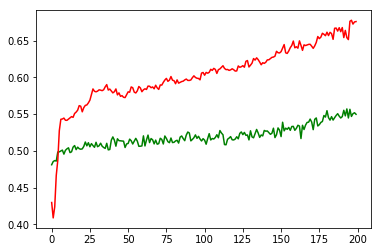

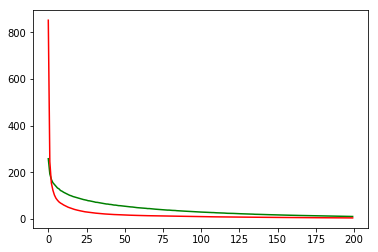

working on d,u and l,learn 0.5 64 0.01 0.001


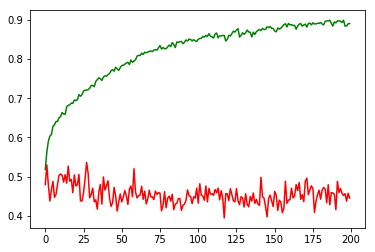

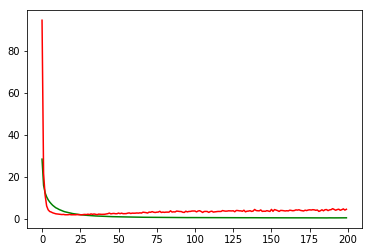

working on d,u and l,learn 0.5 64 0.01 0.0001


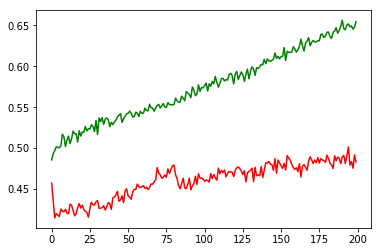

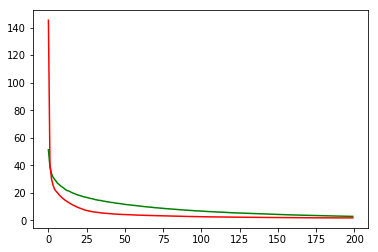

working on d,u and l,learn 0.5 128 0.05 0.001


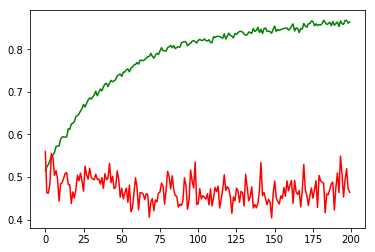

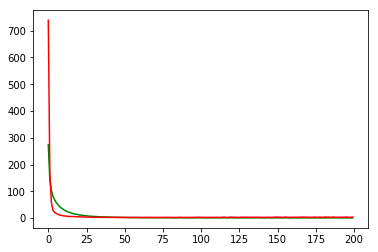

working on d,u and l,learn 0.5 128 0.05 0.0001


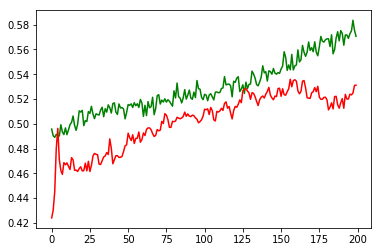

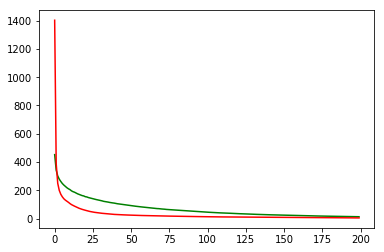

working on d,u and l,learn 0.5 128 0.01 0.001


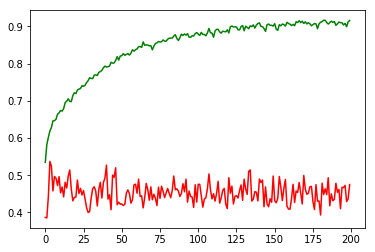

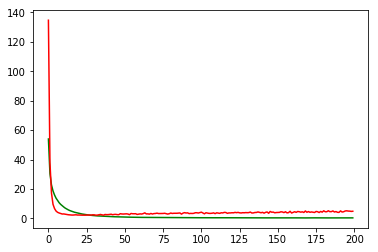

working on d,u and l,learn 0.5 128 0.01 0.0001


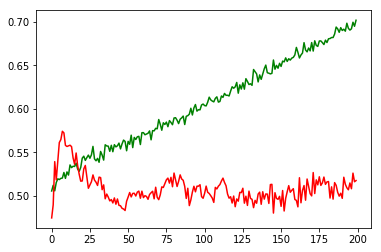

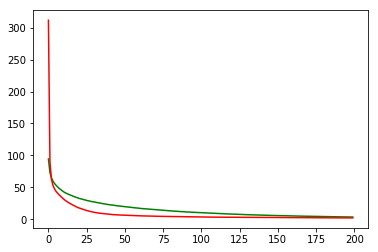

Chart for BEST MODEL FOR: PEP


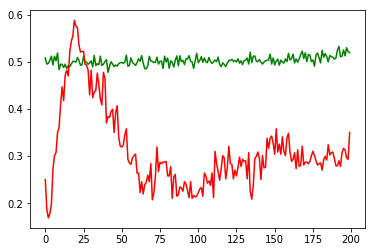

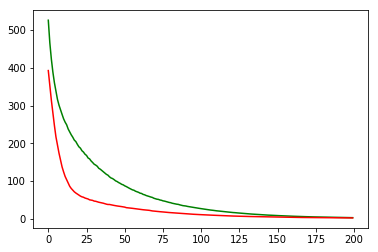

F1,score 0.41975308641975306
G-score: 0.4745277748511466
Accuracy 0.35023041474654376
Accuracy with threshold: 0.35023041474654376
Window: 140
[[ 75  16]
 [407 153]]
Vol pos 1.7567764552661194
Vol neg 2.2578885358631684
Real Percentage of gain: -37.91672443820697
Percentage of gain: -0.8518307509515285
Total gain: -554.541818869445
000000000000000000000000000000000000000000000000
Percentile:  0
ecco la somma Positiva: [0.5076645]
ecco la somma Negativa: [0.48702946]
[[62 10]
 [77 33]]


ValueError: Error when checking input: expected dense_105_input to have shape (151,) but got array with shape (1,)

In [5]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
##SET THRESHOLD
threshold=0.2
o=0
accstocksresults=[]
tresacctotal=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
chartlisttres=[]
gainlist=[]
pricegainlist=[]
countpos=np.zeros(5)
countneg=np.zeros(5)
percentilepos=np.zeros(5)
percentileneg=np.zeros(5)
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

       
        lspace=[0.05,0.01]
        dropspace=[0.5]
        uspace=[64,128]
        learnspace=[0.001,0.0001]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        maxd=0
        maxle=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
               
                for l in lspace:
                     for le in learnspace:
                   
                        print('=========================================================')
                        print('working on d,u and l,learn',d,u,l,le)

                        cvacclist=[]
                        #faccio cross validation
                        #start with 40% as train and 10% for validation and then i move in percentege
                        # 0-40 40-50
                        # 0-50 50-60
                        # 0-60 60-70 
                        #etc test set is completely external i do in some way error extimation changin the ticker
                        trainpoint=math.floor(len(x_tv)*0.40)
                        dimval=math.floor(trainpoint*0.25)
                        endval=trainpoint+dimval
                        model=buildModel(l,u,d,le)
                        epoch=200
                        for i in range(0,6):
                            #print('-----')
                            x_train=x_tv[0:trainpoint]
                            y_train=y_tv[0:trainpoint]
                            x_val=x_tv[trainpoint:endval]
                            y_val=y_tv[trainpoint:endval]

                            trainpoint=trainpoint+dimval
                            endval=endval+dimval

                            x_train,y_train=smote(x_train,y_train)
                            if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                                x_val,y_val=smote(x_val,y_val)
                            else:
                                totu=totu+1

                            history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                              shuffle=True)

                            prediction=model.predict(x_val, batch_size=128, verbose=0)
                            for el in range(0,len(prediction)):
                                if(prediction[el]>0.5):
                                    prediction[el]=1
                                else:
                                    prediction[el]=0



                            if(i==0):
                                meanhvl=np.asarray(history.history['val_loss'])
                                meanhva=np.asarray(history.history['val_acc'])
                                meanhl=np.asarray(history.history['loss'])
                                meanha=np.asarray(history.history['acc'])

                            else:
                                meanhvl=np.add(meanhvl,history.history['val_loss'])
                                meanhva=np.add(meanhva,history.history['val_acc'])
                                meanha=np.add(meanha,history.history['acc'])
                                meanhl=np.add(meanhl,history.history['loss'])
                            #i take the last one
                            #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            #USING G SCORE AS MODEL SELECTION METRIC
                            maxAcc=geometric_mean_score(y_val, prediction)
                            cvacclist.append(maxAcc)
                            reset_weights(model)

                        cvacc=sum(cvacclist)/len(cvacclist)
                        if(cvacc>maxacc):
                            maxacc=cvacc
                            maxu=u
                            maxl=l
                            maxle=le
                            maxd=d

                        meanhvl=meanhvl/6
                        meanhva=meanhva/6
                        meanhl=meanhl/6
                        meanha=meanha/6

                        plt.plot(meanha,'g')
                        plt.plot(meanhva,'r')
                        plt.show()
                        plt.plot(meanhl,'g')
                        plt.plot(meanhvl,'r')
                        plt.show()  

                    
                    
        bestmodel=model=buildModel(maxl,maxu,maxd,maxle)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs = 200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('Chart for BEST MODEL FOR:',files[o-1])
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        
        volr=[]
        voln=[]
        pricegain=0
        ytres=[]
        xtres=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
            if(prediction[j]>=0.5+threshold or prediction[j]<=0.5-threshold):
                xtres.append(x_test[j])
                ytres.append(y_test[j])
        xtres=np.array(xtres)
        ytres=np.array(ytres)
        tresacc=model.evaluate(xtres,ytres, verbose=0)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        tresacctotal.append(tresacc[1])
        print('Accuracy',realacc)
        print('Accuracy with threshold:',tresacc[1])
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        chartscoretres=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            cp=[]
        
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                res=[]
                
                
                
                
                xt,yt=onlythreshold(predictionp,threshold,x_test[distribution[g]],y_test[distribution[g]])
                for pred in range(0,len(predictionp)):
                    res.append(predictionp[pred]+y_test[distribution[g]][pred])
                
                res=np.array(res)
                truenegative=np.argwhere(res<0.5 )
                truepositive=np.argwhere(res>=1.5 )
                if(len(truepositive[:,0])>0):
                   
                    
                    tpos=sum(predictionp[truepositive[:,0]])/len(truepositive[:,0])
                    print('ecco la somma Positiva:',tpos)
                    percentilepos[g]=percentilepos[g]+tpos
                    countpos[g]=+1
                if(len(truenegative[:,0])>0):
                    tneg=sum(predictionp[truenegative[:,0]])/len(truenegative[:,0])
                   
                    
                    print('ecco la somma Negativa:',tneg)
                    percentileneg[g]=percentileneg[g]+tneg
                    countneg[g]=+1
                
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                        
                    else:
                        predictionp[el]=0 
                print(confusion_matrix(y_test[distribution[g]], predictionp))
               
                
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
                tempscoretres=model.evaluate(xt,yt, verbose=0)
                print('Accuracy:',tempscore)
                print('Accuracy with threshold:',tempscoretres)
            chartscore.append(tempscore[1])
            chartscoretres.append(tempscoretres[1])
        chartlist.append(chartscore)
            
        chartlisttres.append(chartscoretres)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
for perc in range(0,5):
    print('Percentile :',perc)
    print(percentilepos)
    print(percentilepos[perc]/countpos[perc])
    print(percentileneg[perc]/countneg[perc])
#print all the accuracy varing the percentile
print('No Threshold')
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
print('Threshold')
for st in range(0,len(chartlisttres)):
    plt.plot(chartlisttres[st])
plt.show()
        

            

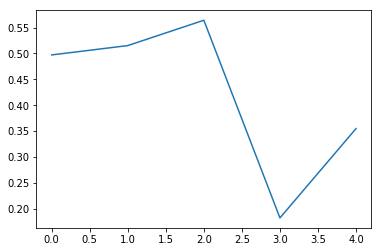

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()

In [ ]:
arr=[2,4,5,6,7,2,4,3,2,2]
arr=np.array(arr)
print(np.argwhere(arr==6))

In [ ]:
print(np.argwhere(res==1))

In [ ]:
print(res)

In [ ]:
print(len(res))

In [ ]:
print(len(res[len(res)-1]))

In [ ]:
print(truepositive[:,0])